# Module

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as Transform
import torch.utils.data as DATA
import matplotlib.pyplot as plt
import numpy as np

# Device

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


# Hyper Parameter

In [3]:
EPOCHS = 60 
LearningRate = 0.005
BatchSize = 1024

# Data & DataLoader

In [4]:
train_data = torchvision.datasets.MNIST(
    root= "./mnist",
    train=True,
    transform= Transform.ToTensor(),
    download=True
)

test_data = torchvision.datasets.MNIST(
    root= "./mnist",
    train=False,
    transform= Transform.ToTensor(),
)

train_loader = DATA.DataLoader(dataset=train_data , batch_size=BatchSize, shuffle=True)
test_loader = DATA.DataLoader(dataset=test_data , batch_size=BatchSize, shuffle=True)

# Q1
Load MNIST training dataset and randomly show 10 images and labels respectively. 


Q1


<function matplotlib.pyplot.show>

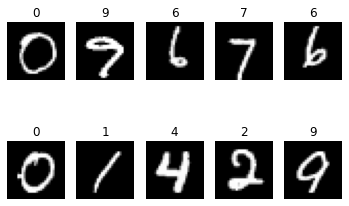

In [5]:
print("Q1")
fig,ax = plt.subplots(2,5)
ax = ax.flatten()
seed = int(len(train_data))
for i in range(10):
  index = np.random.randint(seed)
  data = train_data.data[index].numpy()
  target = train_data.targets[index].numpy()
  ax[i].set_axis_off()
  ax[i].set_title(f'{target}')
  ax[i].imshow(data, cmap='gray')
plt.show



# LeNet5 

In [6]:
class LeNet5(nn.Module):
    def __init__(self):             # 28*28
        super(LeNet5, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 6, 5, 1, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(2),        # 6@14*14
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, 5, 1, padding=0),
            nn.Sigmoid(),
            nn.AvgPool2d(2),        # 16@5*5
        )
        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16*5*5, 120),
            nn.Sigmoid(),
        )
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.Sigmoid(),
        )
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# Optimizer & Criterion

In [7]:
model = LeNet5() 
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=LearningRate)
criterion = nn.CrossEntropyLoss()

LeNet5(
  (conv1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): Sigmoid()
  )
  (fc2): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Sigmoid()
  )
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# Q2
Print out training hyperparameters (batch size, learning rate, optimizer). 

In [8]:
print('Q2')
print(f' Hyperparameters:\n batch_size:{BatchSize} \n learning rate:{LearningRate} \n optimizer:Adam')

Q2
 Hyperparameters:
 batch_size:1024 
 learning rate:0.005 
 optimizer:Adam


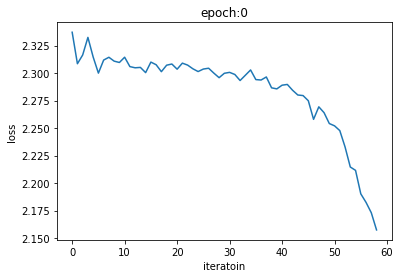

Epoch 0 | train loss:134.8049 | train accuracy:0.130 | test accuracy:0.223800


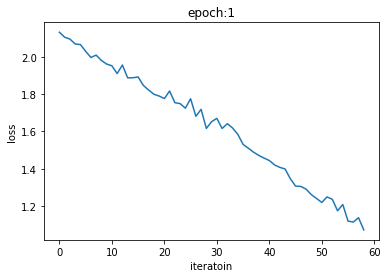

Epoch 1 | train loss:95.9950 | train accuracy:0.405 | test accuracy:0.626900


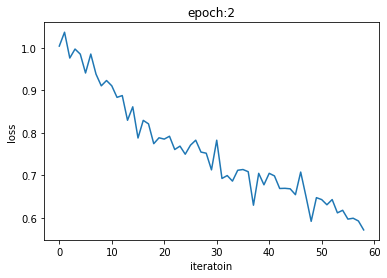

Epoch 2 | train loss:44.8569 | train accuracy:0.732 | test accuracy:0.823200


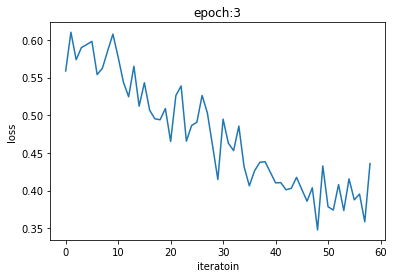

Epoch 3 | train loss:27.9796 | train accuracy:0.852 | test accuracy:0.896500


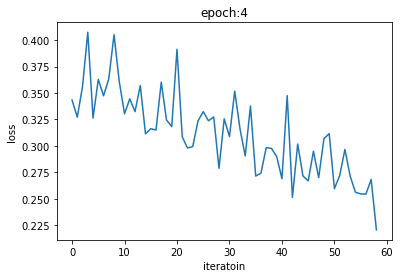

Epoch 4 | train loss:18.4018 | train accuracy:0.906 | test accuracy:0.923700


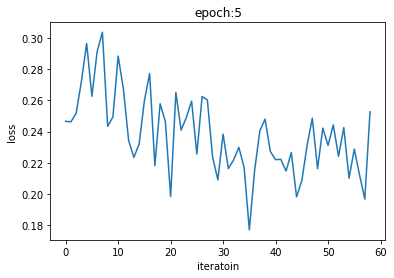

Epoch 5 | train loss:14.0685 | train accuracy:0.927 | test accuracy:0.938300


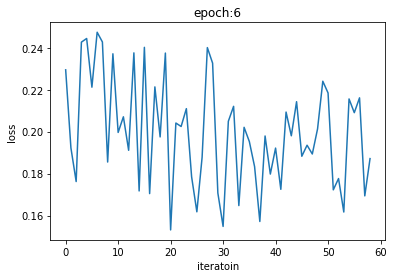

Epoch 6 | train loss:11.7978 | train accuracy:0.939 | test accuracy:0.948500


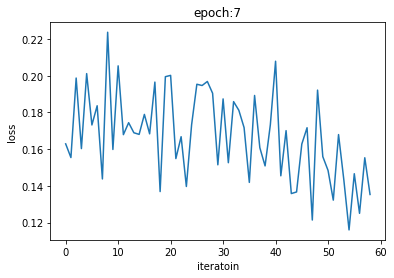

Epoch 7 | train loss:9.8547 | train accuracy:0.950 | test accuracy:0.953100


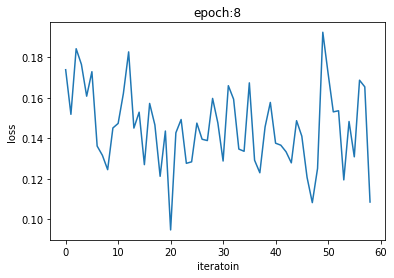

Epoch 8 | train loss:8.5564 | train accuracy:0.955 | test accuracy:0.960400


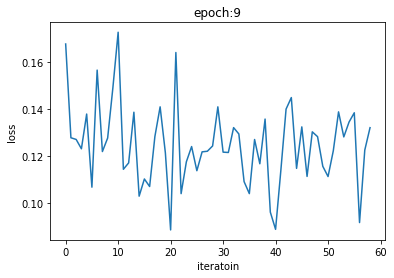

Epoch 9 | train loss:7.3519 | train accuracy:0.962 | test accuracy:0.966500


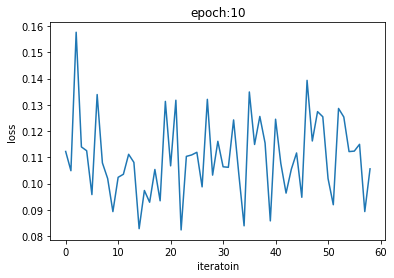

Epoch 10 | train loss:6.4957 | train accuracy:0.966 | test accuracy:0.972700


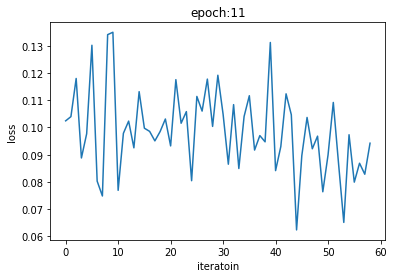

Epoch 11 | train loss:5.8185 | train accuracy:0.970 | test accuracy:0.972000


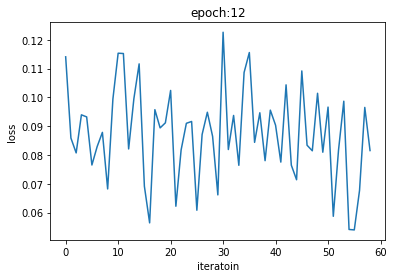

Epoch 12 | train loss:5.1506 | train accuracy:0.973 | test accuracy:0.975700


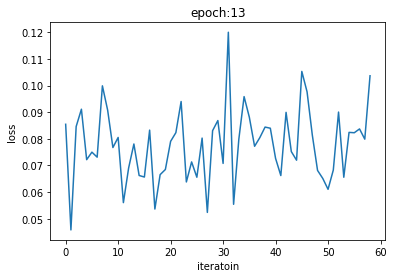

Epoch 13 | train loss:4.5874 | train accuracy:0.976 | test accuracy:0.978600


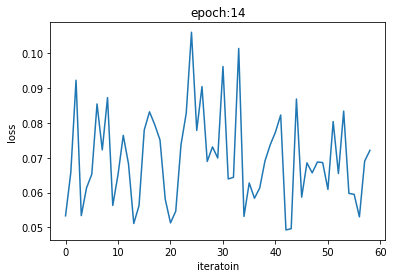

Epoch 14 | train loss:4.1172 | train accuracy:0.979 | test accuracy:0.975600


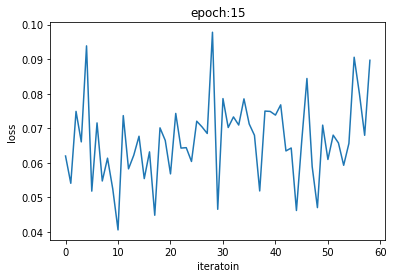

Epoch 15 | train loss:3.9341 | train accuracy:0.980 | test accuracy:0.981600


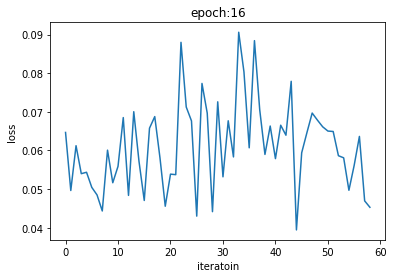

Epoch 16 | train loss:3.6017 | train accuracy:0.982 | test accuracy:0.980900


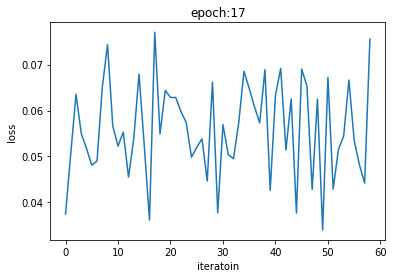

Epoch 17 | train loss:3.2967 | train accuracy:0.983 | test accuracy:0.981800


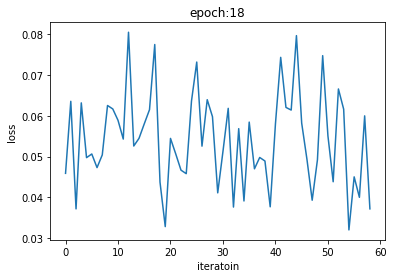

Epoch 18 | train loss:3.1953 | train accuracy:0.984 | test accuracy:0.982400


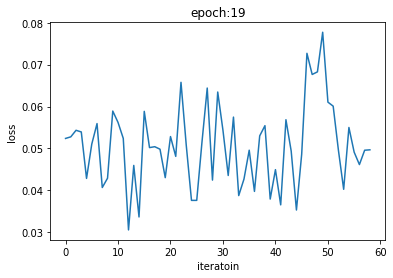

Epoch 19 | train loss:2.9818 | train accuracy:0.985 | test accuracy:0.983400


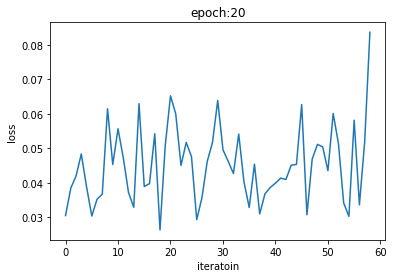

Epoch 20 | train loss:2.6703 | train accuracy:0.987 | test accuracy:0.983400


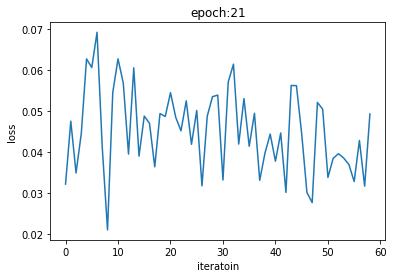

Epoch 21 | train loss:2.6659 | train accuracy:0.986 | test accuracy:0.985300


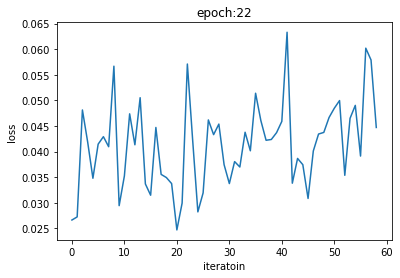

Epoch 22 | train loss:2.4385 | train accuracy:0.987 | test accuracy:0.986100


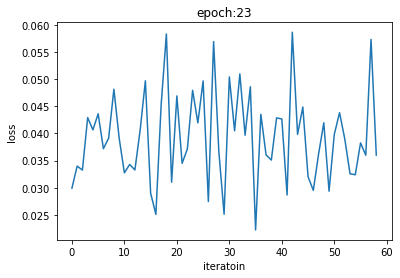

Epoch 23 | train loss:2.3199 | train accuracy:0.988 | test accuracy:0.983500


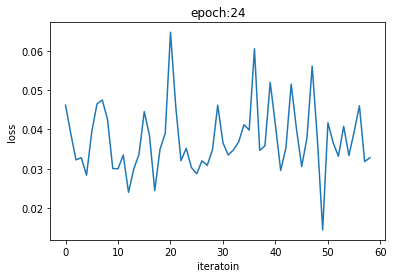

Epoch 24 | train loss:2.2131 | train accuracy:0.989 | test accuracy:0.986000


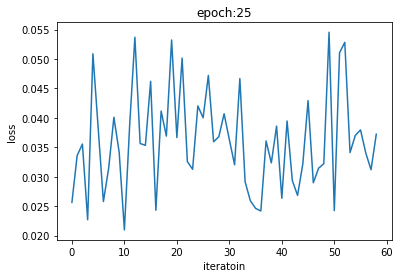

Epoch 25 | train loss:2.1277 | train accuracy:0.989 | test accuracy:0.985800


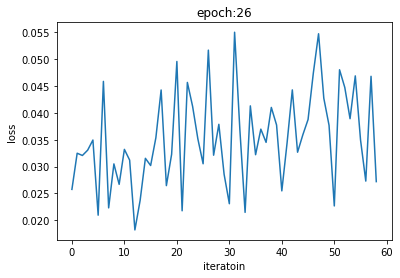

Epoch 26 | train loss:2.0768 | train accuracy:0.989 | test accuracy:0.984800


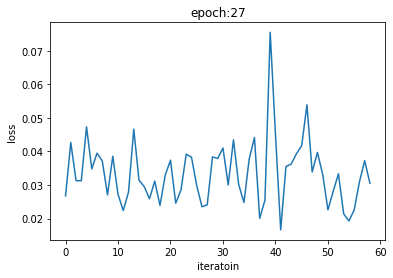

Epoch 27 | train loss:1.9705 | train accuracy:0.990 | test accuracy:0.986700


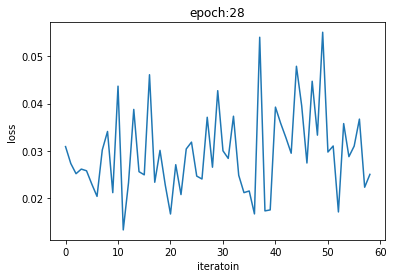

Epoch 28 | train loss:1.7512 | train accuracy:0.991 | test accuracy:0.985400


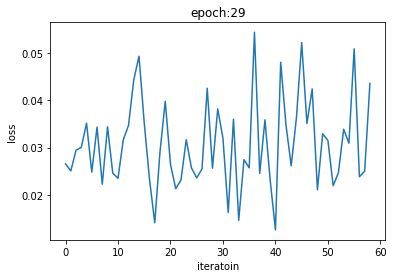

Epoch 29 | train loss:1.8121 | train accuracy:0.990 | test accuracy:0.984800


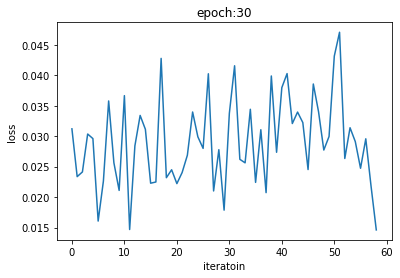

Epoch 30 | train loss:1.7131 | train accuracy:0.991 | test accuracy:0.985700


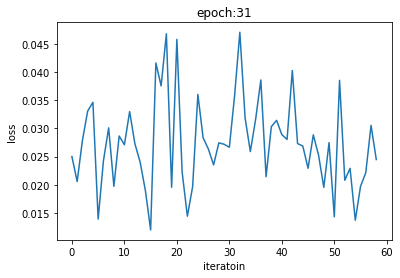

Epoch 31 | train loss:1.6199 | train accuracy:0.991 | test accuracy:0.987500


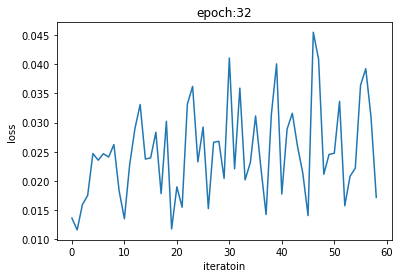

Epoch 32 | train loss:1.4728 | train accuracy:0.993 | test accuracy:0.987600


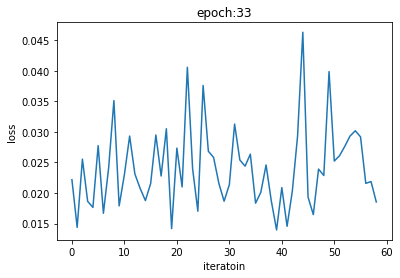

Epoch 33 | train loss:1.4219 | train accuracy:0.993 | test accuracy:0.987800


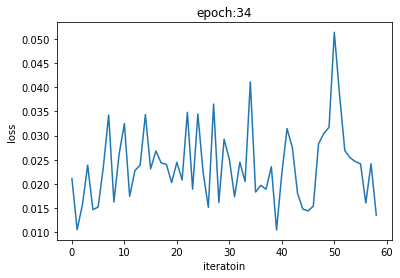

Epoch 34 | train loss:1.4019 | train accuracy:0.992 | test accuracy:0.986700


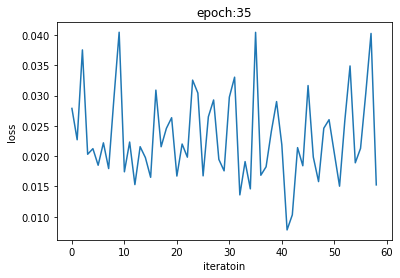

Epoch 35 | train loss:1.3643 | train accuracy:0.993 | test accuracy:0.985200


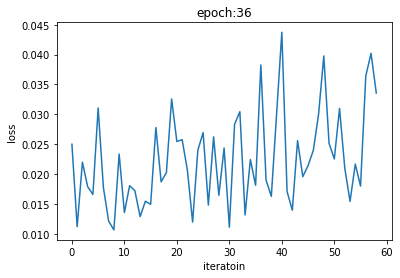

Epoch 36 | train loss:1.3222 | train accuracy:0.993 | test accuracy:0.986100


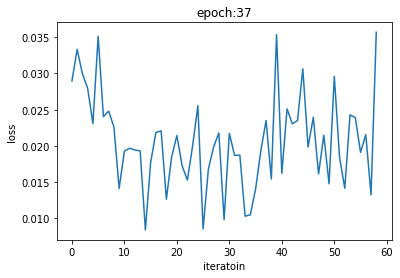

Epoch 37 | train loss:1.2215 | train accuracy:0.993 | test accuracy:0.985900


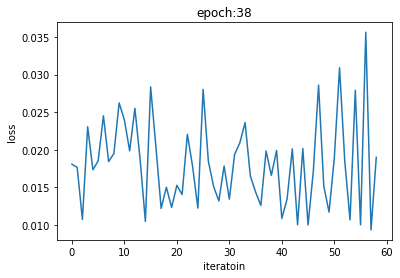

Epoch 38 | train loss:1.0706 | train accuracy:0.995 | test accuracy:0.984600


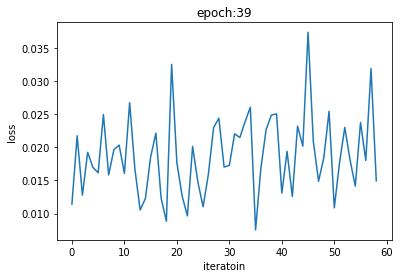

Epoch 39 | train loss:1.1075 | train accuracy:0.994 | test accuracy:0.986400


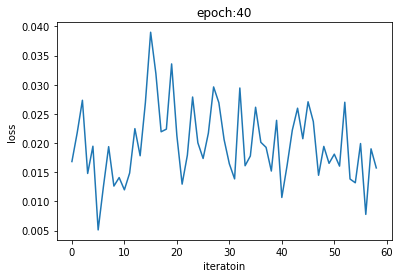

Epoch 40 | train loss:1.1692 | train accuracy:0.994 | test accuracy:0.987700


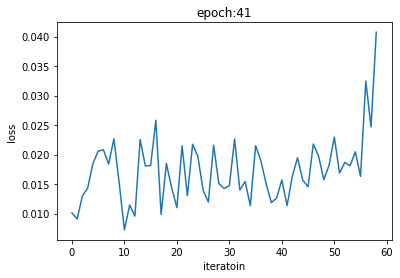

Epoch 41 | train loss:1.0199 | train accuracy:0.994 | test accuracy:0.986400


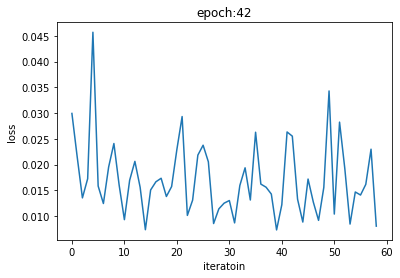

Epoch 42 | train loss:1.0048 | train accuracy:0.995 | test accuracy:0.987800


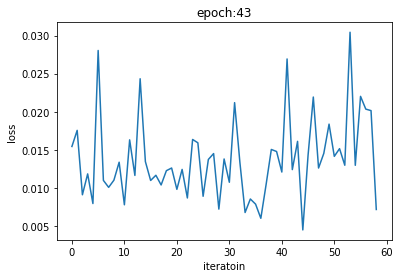

Epoch 43 | train loss:0.8107 | train accuracy:0.996 | test accuracy:0.986100


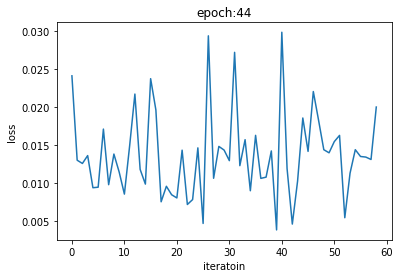

Epoch 44 | train loss:0.8120 | train accuracy:0.996 | test accuracy:0.988500


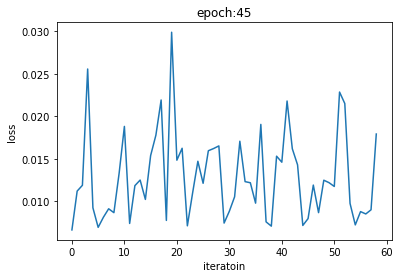

Epoch 45 | train loss:0.7614 | train accuracy:0.996 | test accuracy:0.986800


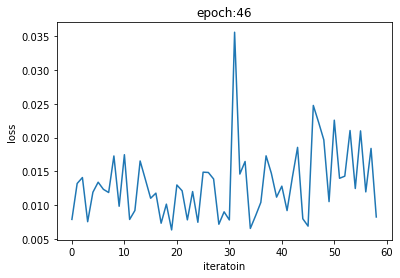

Epoch 46 | train loss:0.7761 | train accuracy:0.996 | test accuracy:0.985100


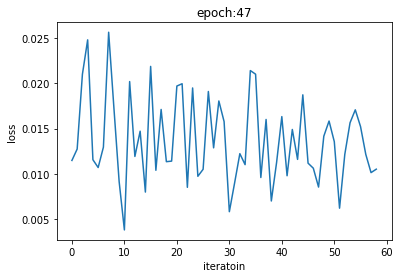

Epoch 47 | train loss:0.8108 | train accuracy:0.996 | test accuracy:0.987700


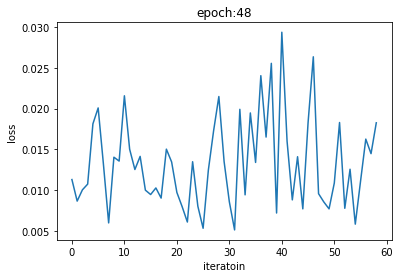

Epoch 48 | train loss:0.7820 | train accuracy:0.996 | test accuracy:0.985500


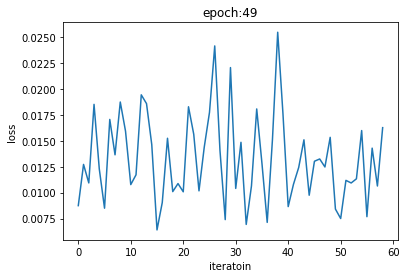

Epoch 49 | train loss:0.7822 | train accuracy:0.996 | test accuracy:0.986900


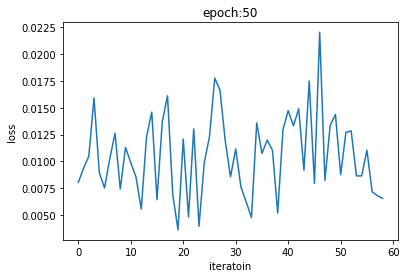

Epoch 50 | train loss:0.6245 | train accuracy:0.997 | test accuracy:0.986800


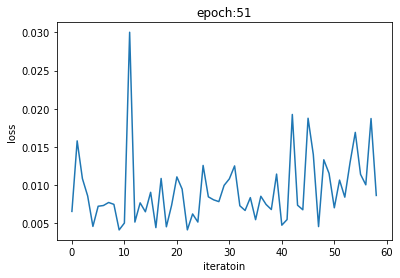

Epoch 51 | train loss:0.5505 | train accuracy:0.998 | test accuracy:0.987300


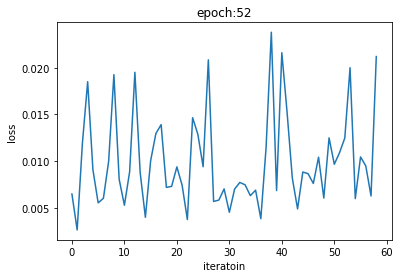

Epoch 52 | train loss:0.5882 | train accuracy:0.997 | test accuracy:0.988500


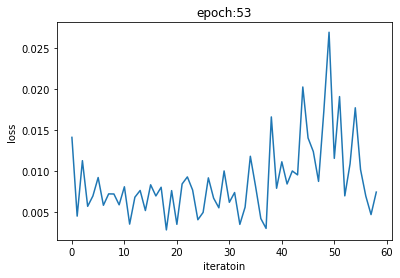

Epoch 53 | train loss:0.5226 | train accuracy:0.997 | test accuracy:0.988500


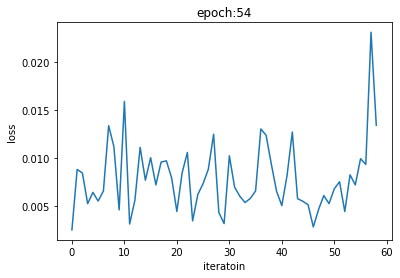

Epoch 54 | train loss:0.4642 | train accuracy:0.998 | test accuracy:0.987900


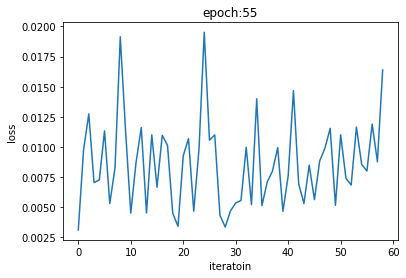

Epoch 55 | train loss:0.5083 | train accuracy:0.998 | test accuracy:0.986500


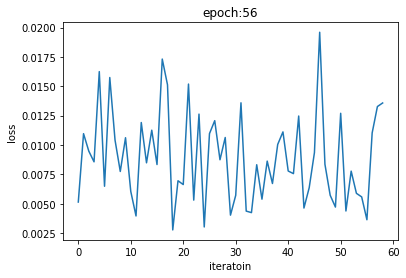

Epoch 56 | train loss:0.5255 | train accuracy:0.997 | test accuracy:0.988300


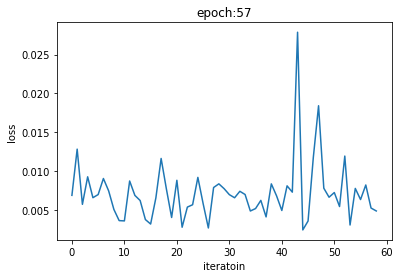

Epoch 57 | train loss:0.4210 | train accuracy:0.998 | test accuracy:0.988700


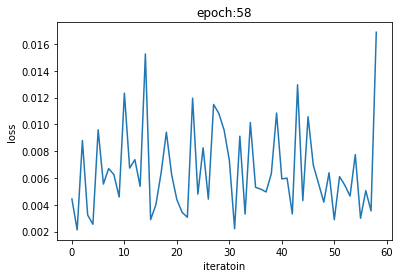

Epoch 58 | train loss:0.3882 | train accuracy:0.998 | test accuracy:0.987400


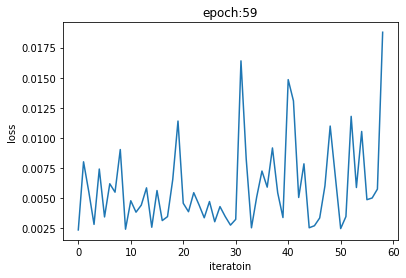

Epoch 59 | train loss:0.3527 | train accuracy:0.999 | test accuracy:0.987900


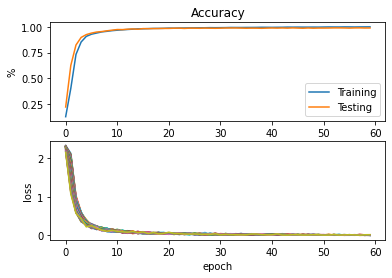

In [9]:
history_train_loss = []
history_train_accuracy = []
history_test_accuracy = []

for epoch in range(EPOCHS):
  train_loss = 0.0 # train_loss in current epoch
  n_correct = 0.0 # train_accuracy in current epoch
  loss_iteration = [] # record the loss in each interation
  
  for data, label in train_loader :
    data = data.to(device)
    label = label.to(device)
    output = model(data)
    loss = criterion(output,label)

    optimizer.zero_grad() # clear the gradient value in the last round
    loss.backward() # calculate the gradient value
    optimizer.step() # update the parameters

    train_loss += loss.item()

    _,output_label = torch.max(output,1)
    n_correct += (label==output_label).sum().item()
    loss_iteration.append(loss.item())

  history_train_loss.append(loss_iteration)
  # Q3
  # show loss per iteration
  plt.plot(loss_iteration)
  plt.xlabel('iteratoin')
  plt.ylabel('loss')
  plt.title(f'epoch:{epoch}')
  plt.show()

  # record train accuracy
  train_accuracy = n_correct/train_data.data.size(0) 
  history_train_accuracy.append(train_accuracy)

  test_correct_number = 0
  for data, label in test_loader:
    data = data.to(device)
    label = label.to(device)
    test_output = model(data)
    _, test_pred_y = torch.max(test_output.data, 1)
    test_correct_number += (test_pred_y == label).sum().item()

  test_accuracy = test_correct_number/test_data.data.size(0)
  history_test_accuracy.append(test_accuracy)

  print(f'Epoch {epoch} | train loss:{train_loss:.4f} | train accuracy:{train_accuracy:.3f} | test accuracy:{test_accuracy:3f}')


torch.save(model, 'LeNet5.pkl')

# Q4
# show Training & Testing Accuracy per epoch
fig, ax = plt.subplots(2, 1)
ax[0].plot(history_train_accuracy, label='Training')
ax[0].plot(history_test_accuracy, label='Testing')
ax[0].legend(loc='best')
ax[0].set_title("Accuracy")
ax[0].set_ylabel('%')

ax[1].plot(history_train_loss)
ax[1].set_ylabel("loss")
ax[1].set_xlabel("epoch")

plt.show()